<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [1]:
student_number = '401106617'
Name = 'Alireza'
Last_Name = 'Mirrokni' 

# Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [11]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    # TODO: Generate dataset
    X = np.random.uniform(range_start, range_end, num_samples)
    
    y = 0.2 * X**6 - 0.5 * X**5 + 2 * X**4 - 5 * X**3 + 3 * X**2 - 10 * X + 5
    noise = np.random.normal(0, noise_std, num_samples)
    y += noise
    
    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

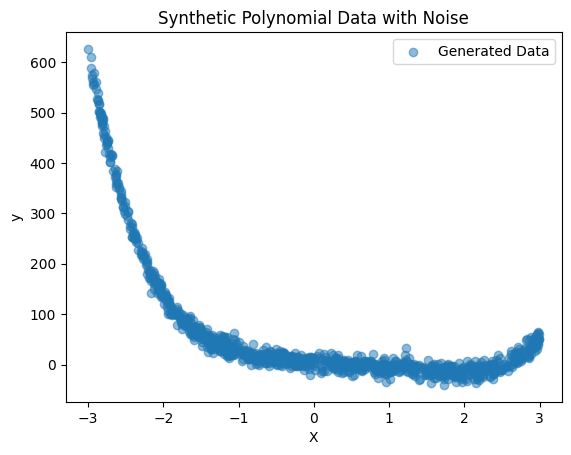

In [20]:
X, y = generate_dataset(-3, 3)

# TODO: Visualize the dataset using scatter
plt.scatter(X, y, alpha=0.5, label='Generated Data')

plt.title('Synthetic Polynomial Data with Noise')
plt.xlabel('X')
plt.ylabel('y')

plt.legend()
plt.show()

## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [21]:
# TODO: Split dataset into the training and the in-range testing sets
test_size = 200
X_train, X_in_range_test, y_train, y_in_range_test = train_test_split(X, y, test_size=test_size / len(X), random_state=42)

# TODO: Generate the out-of-range testing set
X_out_of_range, y_out_of_range = generate_dataset(5, 7)
X_out_of_range, y_out_of_range = X_out_of_range[: test_size], y_out_of_range[: test_size]

print('In-Range Dataset Length:', len(X_in_range_test))
print('Out-of-Range Dataset Length:', len(X_out_of_range))

In-Range Dataset Length: 200
Out-of-Range Dataset Length: 200


Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

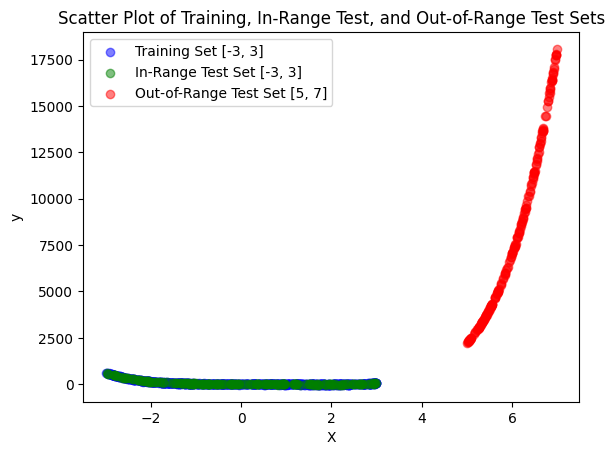

In [22]:
# TODO: Visualize the sets using scatter (or other plots)
plt.scatter(X_train, y_train, alpha=0.5, label='Training Set [-3, 3]', color='blue')
plt.scatter(X_in_range_test, y_in_range_test, alpha=0.5, label='In-Range Test Set [-3, 3]', color='green')
plt.scatter(X_out_of_range, y_out_of_range, alpha=0.5, label='Out-of-Range Test Set [5, 7]', color='red')

plt.title('Scatter Plot of Training, In-Range Test, and Out-of-Range Test Sets')
plt.xlabel('X')
plt.ylabel('y')

plt.legend()
plt.show()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [23]:
def train_models(X, y, degree):
    # TODO: Create and train a model based on the given degree
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    model.fit(X.reshape(-1, 1), y)
    
    return model

In [24]:
models = {}
degree = 9

# TODO: Add the trained models with different degrees to the dict
for d in range(2, degree + 1):
    models[d] = train_models(X_train, y_train, d)

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [25]:
def evaluate_models(models, X_test, y_test):
    # TODO: Calculate MSE of each model (on the input test set).
    losses = {}
    
    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        
        mse = mean_squared_error(y_test, y_pred)
        
        losses[degree] = mse
    
    return losses

In [26]:
# TODO: Evaluate models on both the train and the test sets.
train_mse = evaluate_models(models, X_train, y_train)
in_range_test_mse = evaluate_models(models, X_in_range_test, y_in_range_test)
out_of_range_test_mse = evaluate_models(models, X_out_of_range, y_out_of_range)

# Display the MSE for each degree
print("Train Set MSE:", train_mse)
print("In-Range Test Set MSE:", in_range_test_mse)
print("Out-of-Range Test Set MSE:", out_of_range_test_mse)

Train Set MSE: {2: 2546.3333010218557, 3: 908.4136369338817, 4: 126.4358018639301, 5: 107.1024352373044, 6: 100.81491962902754, 7: 100.54700426643018, 8: 100.36117121492363, 9: 100.23135078999272}
In-Range Test Set MSE: {2: 2257.894287171146, 3: 819.8699789568739, 4: 112.69687399332219, 5: 94.66681517491753, 6: 83.98361220776732, 7: 84.19988166181616, 8: 83.09973221794357, 9: 83.30101882784297}
Out-of-Range Test Set MSE: {2: 75556476.85554418, 3: 111019148.73247819, 4: 28996638.119297147, 5: 75938019.92683971, 6: 316290.3656861722, 7: 42460950.80263534, 8: 324327145.9787272, 9: 10439878566.822823}


## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

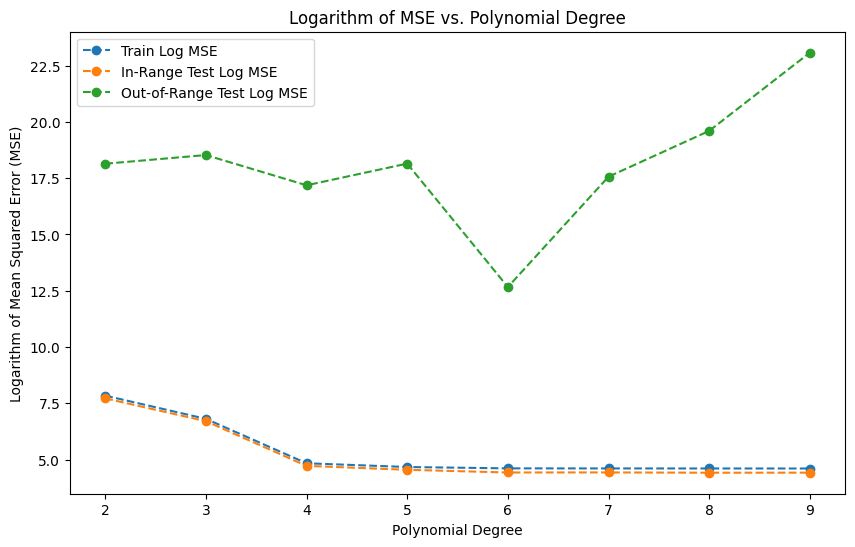

In [27]:
# TODO: Calculate the log MSE for both the train and the test sets based on the model degrees from 2 to 9
train_log_mse = {key : np.log(value) for key, value in train_mse.items()}
in_range_test_log_mse = {key : np.log(value) for key, value in in_range_test_mse.items()}
out_of_range_test_log_mse = {key : np.log(value) for key, value in out_of_range_test_mse.items()}

# TODO: Plot the log MSE results
plt.figure(figsize=(10, 6))
plt.plot(train_log_mse.keys(), train_log_mse.values(), label='Train Log MSE', linestyle='--', marker='o')
plt.plot(in_range_test_log_mse.keys(), in_range_test_log_mse.values(), label='In-Range Test Log MSE', linestyle='--', marker='o')
plt.plot(out_of_range_test_log_mse.keys(), out_of_range_test_log_mse.values(), label='Out-of-Range Test Log MSE', linestyle='--', marker='o')

plt.title('Logarithm of MSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Logarithm of Mean Squared Error (MSE)')
plt.legend()

plt.show()

In [28]:
# TODO: Print each model loss on the training and the two test sets
print(f"{'Degree':<10}{'Train MSE':<20}{'In-Range Test MSE':<25}{'Out-of-Range Test MSE'}")
    
for degree in train_log_mse.keys():
    train_mse = train_log_mse[degree]
    in_range_test_mse = in_range_test_log_mse[degree]
    out_of_range_test_mse = out_of_range_test_log_mse[degree]
    
    print(f"{degree:<10}{train_mse:<20.2f}{in_range_test_mse:<25.2f}{out_of_range_test_mse:.2f}")

Degree    Train MSE           In-Range Test MSE        Out-of-Range Test MSE
2         7.84                7.72                     18.14
3         6.81                6.71                     18.53
4         4.84                4.72                     17.18
5         4.67                4.55                     18.15
6         4.61                4.43                     12.66
7         4.61                4.43                     17.56
8         4.61                4.42                     19.60
9         4.61                4.42                     23.07


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:cyan;">**Answer:** 
- **Low-degree polynomials (degree 2-3)** show high bias, as both training and test losses are high, meaning the model is too simple and underfits the data.

- **Medium-degree polynomials (degree 4-6)** strike a balance between bias and variance. These models have the lowest in-range test losses, demonstrating good generalization.

- **High-degree polynomials (degree 7-9)** have very low training loss but struggle with test loss, especially on out-of-range data, indicating overfitting (high variance).

**The Trade-off:** As model complexity increases, bias decreases but variance increases, impacting the model's ability to generalize to new data.</span>

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:cyan;">**Answer:**  
- **Low-degree models** underfit the data. They have high bias and fail to capture the complexity of the data, resulting in high training and test losses.
  
- **High-degree models** overfit the data. They fit the training data almost perfectly, capturing noise as well, which leads to low training loss but high test loss (especially on out-of-range data), indicating poor generalization.
  
- **Conclusion**: Model complexity should be carefully balanced. A medium-degree polynomial often achieves the best tradeoff between bias and variance, reducing both training loss and test loss to achieve good generalization.

**Selecting the right degree:** Understanding the relationship between model complexity and the bias-variance tradeoff helps in choosing a degree that avoids both underfitting and overfitting, ensuring the model generalizes well to new data.</span>

# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. 

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [29]:
file_path = "./InsuranceData.csv"
test_path = "./InsuranceData_test.csv"

# TODO: Load the Dataset
data = pd.read_csv(file_path)
X_test = pd.read_csv(test_path)

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Get a brief description and do some EDA to get familiar with the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

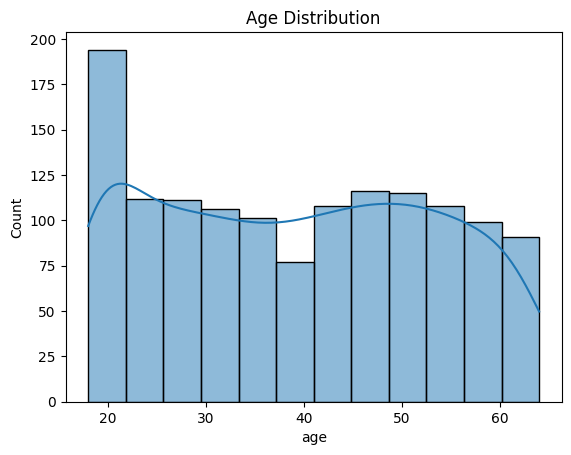

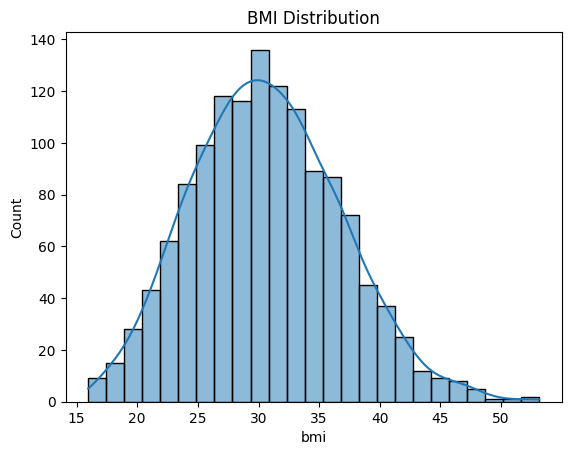

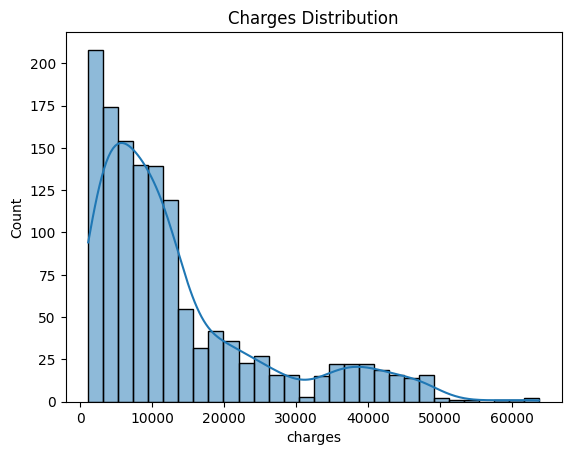

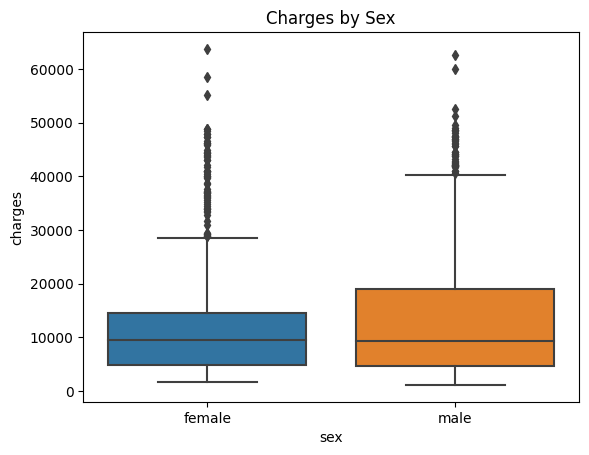

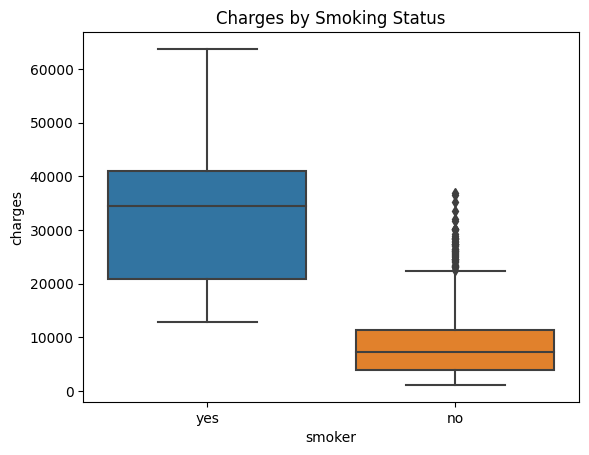

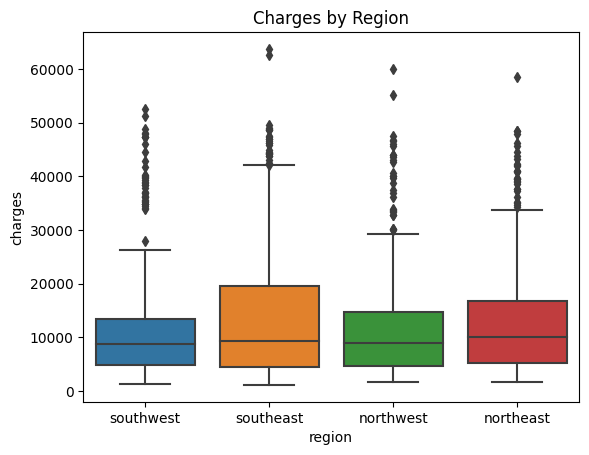

In [30]:
# TODO: you can use .info() and .description()
print(data.info())
print(data.describe())

sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(data['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

sns.histplot(data['charges'], kde=True)
plt.title('Charges Distribution')
plt.show()

sns.boxplot(x='sex', y='charges', data=data)
plt.title('Charges by Sex')
plt.show()

sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Charges by Smoking Status')
plt.show()

sns.boxplot(x='region', y='charges', data=data)
plt.title('Charges by Region')
plt.show()

# Preprocessing

In [31]:
# TODO: apply any pre processing method you think is necessary
# Options: Normalization, Standardization, Outlier Detection, Imputation, Encoding, etc.
from sklearn.impute import SimpleImputer

data = pd.get_dummies(data, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children']
data[numerical_features] = scaler.fit_transform(data[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

imputer = SimpleImputer(strategy='mean')
data[numerical_features] = imputer.fit_transform(data[numerical_features])

Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1
outliers = (data['charges'] < (Q1 - 1.5 * IQR)) | (data['charges'] > (Q3 + 1.5 * IQR))
data = data[~outliers]

data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,1725.55230,True,False,False,True,False
2,-0.797954,0.383307,1.580926,4449.46200,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,21984.47061,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,3866.85520,True,False,True,False,False


In [32]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
X = data.drop('charges', axis=1)
y = data['charges']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_valid.shape}, {y_valid.shape}')

Training set: (959, 8), (959,)
Validation set: (240, 8), (240,)


# Training

Fit a linear regressor to the data.

In [33]:
# TODO: Use sklearn
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

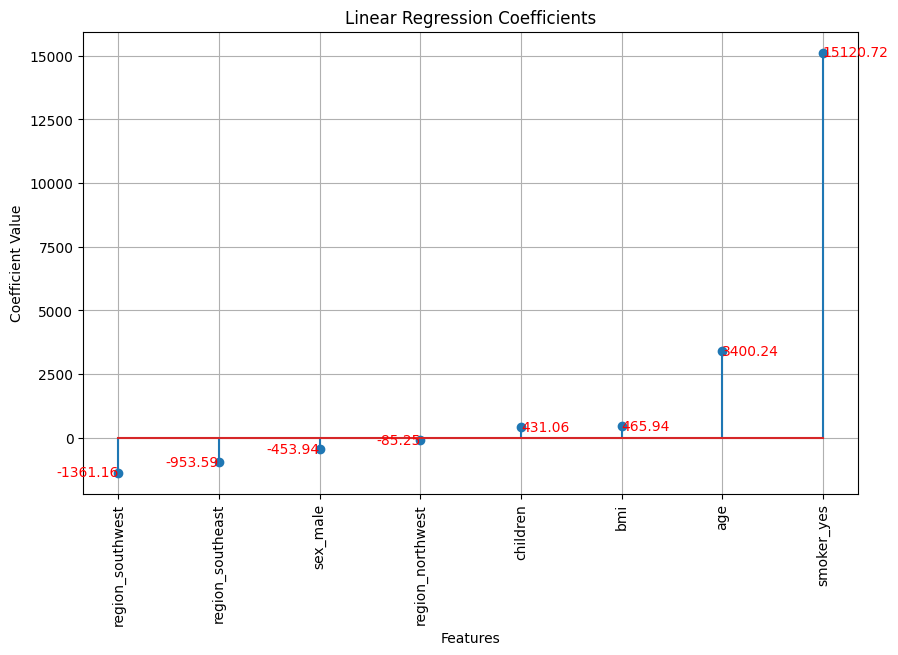

In [34]:
# TODO:
coefficients = regressor.coef_
features = X_train.columns

coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coeff_df = coeff_df.sort_values(by='Coefficient')

plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(coeff_df['Feature'], coeff_df['Coefficient'])
plt.setp(stemlines, 'color', plt.getp(markerline, 'color'))

for i, (feature, coef) in enumerate(zip(coeff_df['Feature'], coeff_df['Coefficient'])):
    plt.text(i, coef, f'{coef:.2f}', ha='right' if coef < 0 else 'left', va='center', fontsize=10, color='red')
    
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

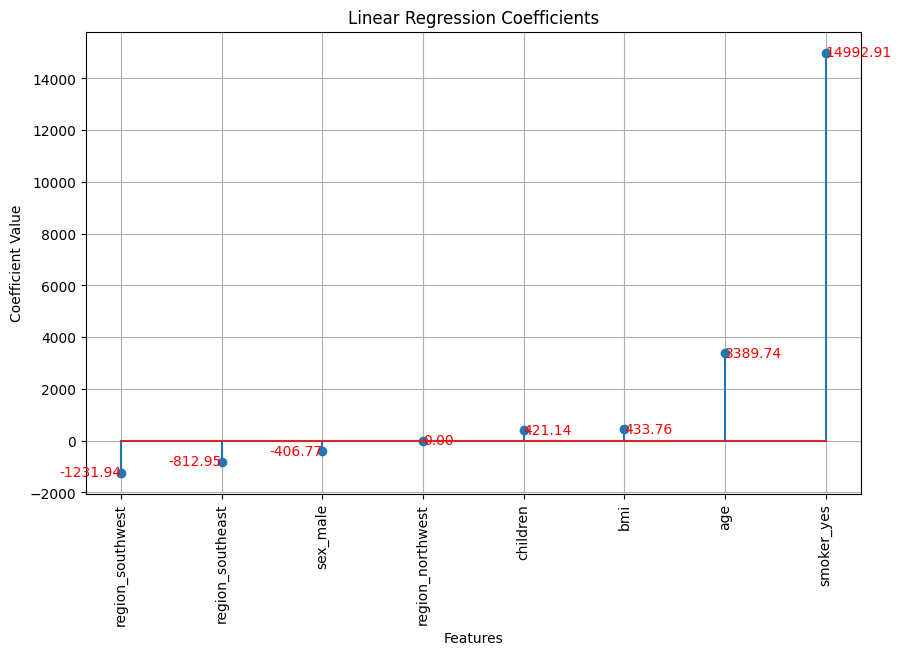

In [40]:
# TODO: Use Lasso from sklearn library
# TODO: Use Lasso from sklearn library
lasso = Lasso(max_iter=10000, alpha=10.0)

lasso.fit(X_train, y_train)

lasso_coefficients = lasso.coef_
lasso_coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': lasso_coefficients})
lasso_coeff_df = lasso_coeff_df.sort_values(by='Coefficient')

plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(lasso_coeff_df['Feature'], lasso_coeff_df['Coefficient'])
plt.setp(stemlines, 'color', plt.getp(markerline, 'color'))

for i, (feature, coef) in enumerate(zip(lasso_coeff_df['Feature'], lasso_coeff_df['Coefficient'])):
    plt.text(i, coef, f'{coef:.2f}', ha='right' if coef < 0 else 'left', va='center', fontsize=10, color='red')
    
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.xticks(rotation=90)
plt.grid(True)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

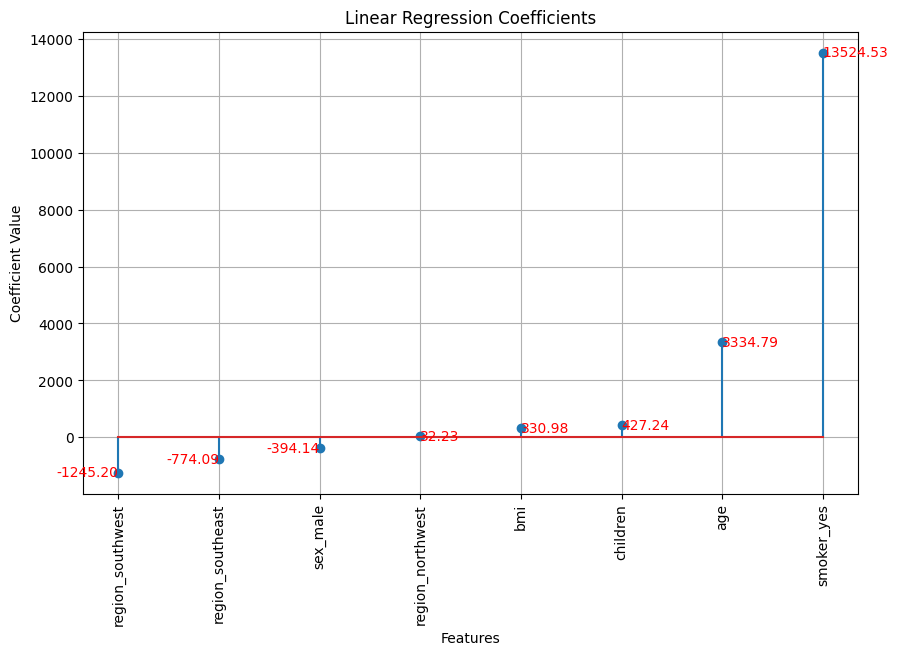

In [41]:
# TODO: Use Ridge from sklearn library
ridge = Ridge(max_iter=10000, alpha=10.0)

ridge.fit(X_train, y_train)

ridge_coefficients = ridge.coef_
ridge_coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': ridge_coefficients})
ridge_coeff_df = ridge_coeff_df.sort_values(by='Coefficient')

plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(ridge_coeff_df['Feature'], ridge_coeff_df['Coefficient'])
plt.setp(stemlines, 'color', plt.getp(markerline, 'color'))

for i, (feature, coef) in enumerate(zip(ridge_coeff_df['Feature'], ridge_coeff_df['Coefficient'])):
    plt.text(i, coef, f'{coef:.2f}', ha='right' if coef < 0 else 'left', va='center', fontsize=10, color='red')
    
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.xticks(rotation=90)
plt.grid(True)

Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

Best alpha for Lasso: 0.02
Best alpha for Ridge: 0.02


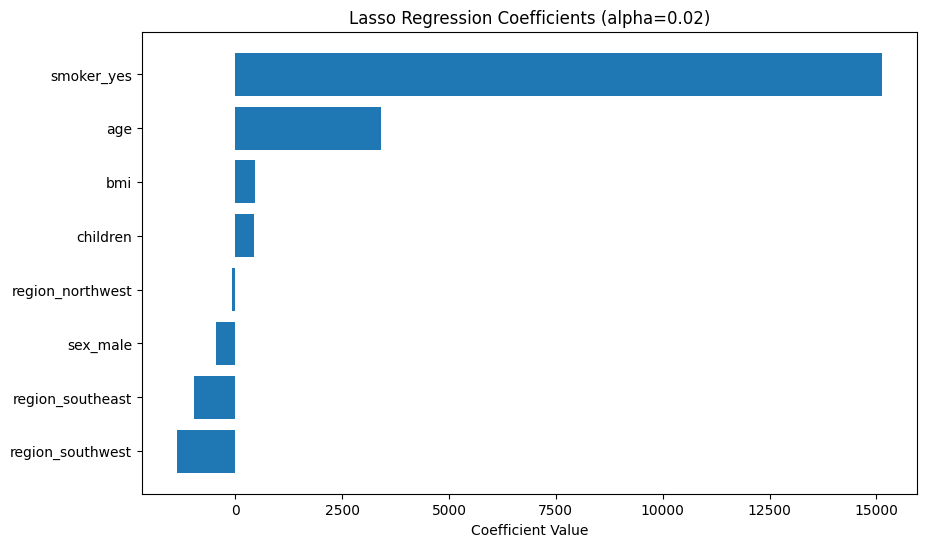

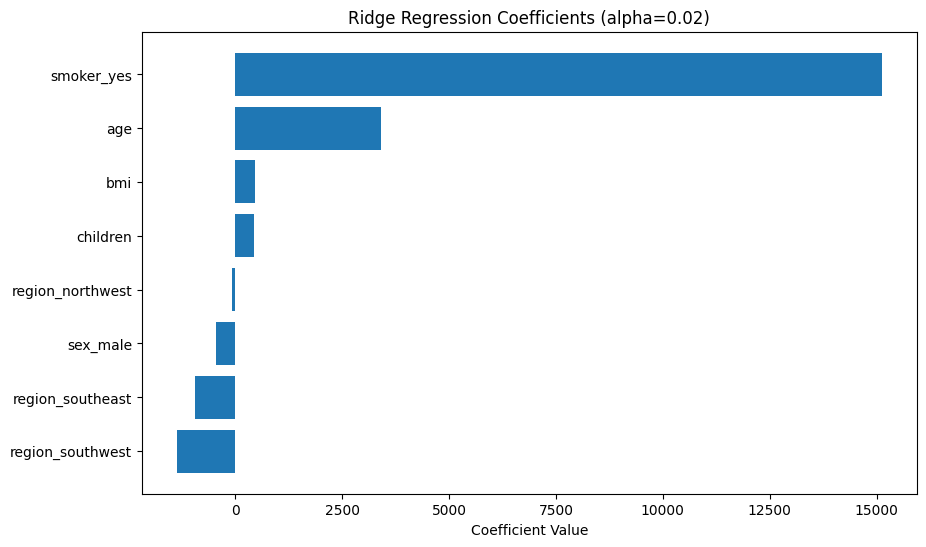

In [42]:
# TODO: Use folding methods and mape from sklearn library
alphas = [0.02, 0.1, 0.5, 1.0, 5.0, 10.0]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def cross_validate_model(model, X, y, alphas, cv):
    results = {}
    for alpha in alphas:
        model.set_params(alpha=alpha)
        mape_scores = []
        
        for train_index, val_index in cv.split(X):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            model.fit(X_train, y_train)
            y_val_pred = model.predict(X_val)
            mape_scores.append(mean_absolute_percentage_error(y_val, y_val_pred))
        
        results[alpha] = np.mean(mape_scores)
        
    return results

lasso_results = cross_validate_model(lasso, X_train, y_train, alphas, kf)
best_alpha_lasso = min(lasso_results, key=lasso_results.get)
print(f'Best alpha for Lasso: {best_alpha_lasso}')

ridge_results = cross_validate_model(ridge, X_train, y_train, alphas, kf)
best_alpha_ridge = min(ridge_results, key=ridge_results.get)
print(f'Best alpha for Ridge: {best_alpha_ridge}')

lasso_best = Lasso(alpha=best_alpha_lasso).fit(X_train, y_train)
ridge_best = Ridge(alpha=best_alpha_ridge).fit(X_train, y_train)

lasso_best_coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso_best.coef_}).sort_values(by='Coefficient')
plt.figure(figsize=(10, 6))
plt.barh(lasso_best_coeff_df['Feature'], lasso_best_coeff_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title(f'Lasso Regression Coefficients (alpha={best_alpha_lasso})')
plt.show()

ridge_best_coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': ridge_best.coef_}).sort_values(by='Coefficient')
plt.figure(figsize=(10, 6))
plt.barh(ridge_best_coeff_df['Feature'], ridge_best_coeff_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title(f'Ridge Regression Coefficients (alpha={best_alpha_ridge})')
plt.show()

Add extra variables to dataset to make model more complex, then compare the results. 

In [43]:
# TODO: Increase No. of dimensions using PolynomialFeatures from sklearn 
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = pd.DataFrame(poly.fit_transform(X_train))
X_valid_poly = pd.DataFrame(poly.transform(X_valid))
X_test_poly = pd.DataFrame(poly.transform(X_test))

poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)
y_val_pred_poly = poly_regressor.predict(X_valid_poly)
mape_val_poly = mean_absolute_percentage_error(y_valid, y_val_pred_poly)
print(f'Polynomial Linear Regression Validation MAPE: {mape_val_poly}')

lasso_best_poly = Lasso(alpha=best_alpha_lasso, max_iter=10000).fit(X_train_poly, y_train)
ridge_best_poly = Ridge(alpha=best_alpha_ridge, max_iter=10000).fit(X_train_poly, y_train)

y_val_pred_lasso_poly = lasso_best_poly.predict(X_valid_poly)
y_val_pred_ridge_poly = ridge_best_poly.predict(X_valid_poly)
mape_val_lasso_poly = mean_absolute_percentage_error(y_valid, y_val_pred_lasso_poly)
mape_val_ridge_poly = mean_absolute_percentage_error(y_valid, y_val_pred_ridge_poly)

print(f'Lasso Polynomial Regression Validation MAPE: {mape_val_lasso_poly}')
print(f'Ridge Polynomial Regression Validation MAPE: {mape_val_ridge_poly}')

Polynomial Linear Regression Validation MAPE: 0.28248631429010324
Lasso Polynomial Regression Validation MAPE: 0.28247964394569297
Ridge Polynomial Regression Validation MAPE: 0.28245975358087433


Report your best model with its evaluated results.

In [44]:
# TODO: Print each model's loss on the training and the test set.
lasso_results = cross_validate_model(lasso, X_train_poly, y_train, alphas, kf)
best_alpha_lasso = min(lasso_results, key=lasso_results.get)
print(f'Best alpha for Lasso: {best_alpha_lasso}')

ridge_results = cross_validate_model(ridge, X_train_poly, y_train, alphas, kf)
best_alpha_ridge = min(ridge_results, key=ridge_results.get)
print(f'Best alpha for Ridge: {best_alpha_ridge}')

lasso_best_poly = Lasso(alpha=best_alpha_lasso, max_iter=10000).fit(X_train_poly, y_train)
ridge_best_poly = Ridge(alpha=best_alpha_ridge, max_iter=10000).fit(X_train_poly, y_train)

y_train_pred_lasso_poly = lasso_best_poly.predict(X_train_poly)
y_train_pred_ridge_poly = ridge_best_poly.predict(X_train_poly)

y_valid_pred_lasso_poly = lasso_best_poly.predict(X_valid_poly)
y_valid_pred_ridge_poly = ridge_best_poly.predict(X_valid_poly)

mape_train_lasso_poly = mean_absolute_percentage_error(y_train, y_train_pred_lasso_poly)
mape_train_ridge_poly = mean_absolute_percentage_error(y_train, y_train_pred_ridge_poly)

mape_valid_lasso_poly = mean_absolute_percentage_error(y_valid, y_valid_pred_lasso_poly)
mape_valid_ridge_poly = mean_absolute_percentage_error(y_valid, y_valid_pred_ridge_poly)

print(f'Lasso Polynomial Regression Training MAPE: {mape_train_lasso_poly}')
print(f'Ridge Polynomial Regression Training MAPE: {mape_train_ridge_poly}')
print(f'Lasso Polynomial Regression Validation MAPE: {mape_valid_lasso_poly}')
print(f'Ridge Polynomial Regression Validation MAPE: {mape_valid_ridge_poly}')

mse_train_lasso_poly = mean_squared_error(y_train, y_train_pred_lasso_poly)                                       
mse_train_ridge_poly = mean_squared_error(y_train, y_train_pred_ridge_poly)

mse_valid_lasso_poly = mean_squared_error(y_valid, y_val_pred_lasso_poly)
mse_valid_ridge_poly = mean_squared_error(y_valid, y_val_pred_ridge_poly)

print(f'Lasso Polynomial Regression Training MSE: {mse_train_lasso_poly}')
print(f'Ridge Polynomial Regression Training MSE: {mse_train_ridge_poly}')
print(f'Lasso Polynomial Regression Validation MSE: {mse_valid_lasso_poly}')
print(f'Ridge Polynomial Regression Validation MSE: {mse_valid_ridge_poly}')

Best alpha for Lasso: 0.02
Best alpha for Ridge: 0.02
Lasso Polynomial Regression Training MAPE: 0.25856723289270567
Ridge Polynomial Regression Training MAPE: 0.2586044600452849
Lasso Polynomial Regression Validation MAPE: 0.28247964394569297
Ridge Polynomial Regression Validation MAPE: 0.28245975358087433
Lasso Polynomial Regression Training MSE: 16534440.053785965
Ridge Polynomial Regression Training MSE: 16534449.235296266
Lasso Polynomial Regression Validation MSE: 26684037.49875371
Ridge Polynomial Regression Validation MSE: 26680325.118046165


In [45]:
y_test_pred_ridge = ridge_best_poly.predict(X_test_poly)
submission_df = pd.DataFrame({'charges': y_test_pred_ridge})
submission_df.to_csv('submission.csv', index=False)

## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




- <span style="color:cyan;">**Answer:** 

- **L1 Regularization (Lasso)**: Encourages sparsity. This means it tends to reduce the coefficients of less important features to zero, effectively performing feature selection. The resulting model is simpler, with fewer features having non-zero weights.

- **L2 Regularization (Ridge)**: Doesn’t necessarily drive coefficients to zero but shrinks all coefficients evenly. This makes the model more robust to collinearity, but all features retain some influence, leading to less sparsity compared to L1.

In conclusion, Lasso is particularly useful when you want a simpler model with fewer features, while Ridge is more effective for handling multicollinearity without eliminating </span>


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

- <span style="color:cyan;">**Answer:** 

**Impact on Features:**
- **L1 Regularization (Lasso)**: Higher alpha increases sparsity, driving many coefficients to zero, thus simplifying the model.
- **L2 Regularization (Ridge)**: Higher alpha shrinks all coefficients uniformly, enhancing stability but retaining all features.

**Model Explainability:**
- **L1 Regularization (Lasso)**: Improves explainability by focusing on the most important features and reducing noise.
- **L2 Regularization (Ridge)**: Enhances robustness without simplifying the feature set as much as Lasso.

Lasso helps in creating a more interpretable model by eliminating irrelevant features, while Ridge improves model stability and handles multicollinearity.</span>

3. How does the regularization affect dimension expansion?

- <span style="color:cyan;">**Answer:** 

- **L1 Regularization (Lasso)**: Tends to drive many coefficients to zero, leading to a sparse model. In the context of polynomial features, this helps in selecting only the most relevant polynomial terms, simplifying the model and reducing overfitting.

- **L2 Regularization (Ridge)**: Shrinks the magnitude of coefficients without driving them to zero, maintaining the complexity of the model. This is beneficial in polynomial features as it helps handle collinearity and ensures that all features, including interaction terms, contribute to the prediction, albeit with reduced influence. </span>